# 1:  Image Classification Using EfficientNet B0 with Imagenet pretrained Model

In [1]:
# To use EfficientNetB0 for classifying 1000 classes of images from imagenet, we can use Imagenet weights.

from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')  #trained on 1000 classes of Imagenet dataset


In [2]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [3]:
# import os
# model.save(os.path.abspath(os.getcwd())+"/model_result/"+"EFN_Pretrained.h5")

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Input image shape: (1, 224, 224, 3)


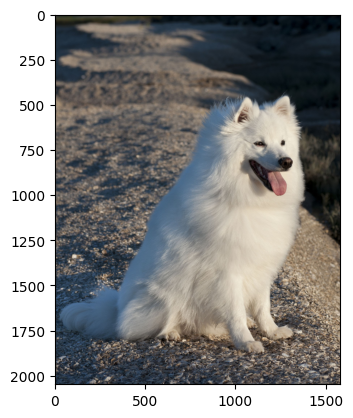

In [20]:
import cv2
import numpy as np
import os
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = os.path.abspath(os.getcwd()) + '/predict_sample/Eskimo_Dog.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)



In [21]:
preds=model.predict(x)
print("predicted class: ", preds )    # probabilities for being in each of the 1000 classes



1/1 [==============================] - 1s 1s/step
predicted class:  [[9.65892759e-05 5.70502380e-05 3.23293934e-04 1.95205139e-04
  1.28475338e-04 8.40863388e-04 1.27219956e-03 1.73493652e-04
  5.05836855e-04 7.28564119e-05 5.44363647e-05 9.32898256e-05
  4.96736175e-05 1.31661232e-04 1.35828421e-04 3.34004071e-05
  2.06785000e-04 4.24735743e-04 7.10073145e-05 6.81145393e-05
  4.76995883e-05 3.93235241e-04 3.45541106e-04 5.09427991e-05
  4.56425805e-05 2.30179459e-04 1.26803687e-04 2.66098214e-04
  5.35165425e-04 8.48670679e-05 2.51414778e-04 4.09018103e-05
  6.24894456e-05 4.68676408e-05 2.12383777e-04 3.93274204e-05
  1.47561266e-04 5.82282410e-05 1.80919142e-05 2.55477771e-05
  2.71977242e-05 3.68251640e-05 6.35137767e-05 8.59040665e-05
  4.52274398e-05 5.70399534e-05 3.28208298e-05 7.95578671e-05
  4.68477119e-05 9.23598345e-05 1.48467414e-04 2.07016157e-04
  6.46109766e-06 4.67407881e-05 5.96506788e-06 6.46517510e-05
  4.20843025e-05 9.44806452e-05 1.42929508e-04 9.37405130e-05
  

In [22]:
decode_predictions(preds,top=3)  #  # probabilities for being in top of the 3 classes

[[('n02111889', 'Samoyed', 0.19717371),
  ('n02120079', 'Arctic_fox', 0.19511674),
  ('n02123394', 'Persian_cat', 0.12746212)]]